In [1]:
nodefile = "../data/vertex/vertex.csv"
edgefile = "../data/edge/edge.csv"
jsonfile = "../data/geojson/multigraph.geojson"

import pandas as pd
import geopandas
import contextily as cx

df_geo = geopandas.read_file(jsonfile)
df_vertex = pd.read_csv(nodefile)
df_edge = pd.read_csv(edgefile)

In [2]:
print(df_geo["layer"].unique())

['road' 'train' 'metro' 'tram']


In [3]:
filter_list = ['train', 'metro']
df_train_metro = df_geo[df_geo.layer.isin(filter_list)]

filter_list = ['tram', 'metro']
df_tram_metro = df_geo[df_geo.layer.isin(filter_list)]

df_road = df_geo[df_geo["layer"]=="road"]

df_reg_S = geopandas.read_file("geojsons/iledefrance_dep_cent.geojson") # https://france-geojson.gregoiredavid.fr/
df_reg_M = geopandas.read_file("geojsons/iledefrance.geojson") 
df_reg_L = geopandas.read_file("geojsons/iledefrance_et_reg_conf.geojson")

In [4]:
df_train_metro.explore()

In [5]:
df_tram_metro.explore()

Results

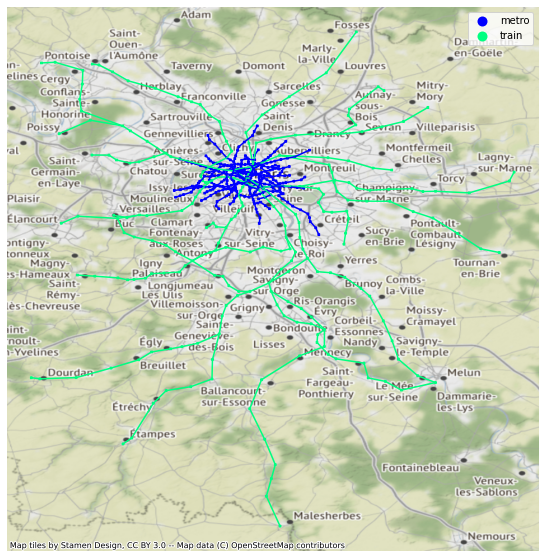

In [32]:
ax = df_train_metro.plot(
                   marker='x',
                    column="layer",
                   legend=True,
                   legend_kwds={'loc': 'best'},
                   cmap="winter",  
                   markersize=5, 
                   figsize=(10, 10))
cx.add_basemap(ax, crs=df_train_metro.crs)

ax.set_axis_off()

Blank version

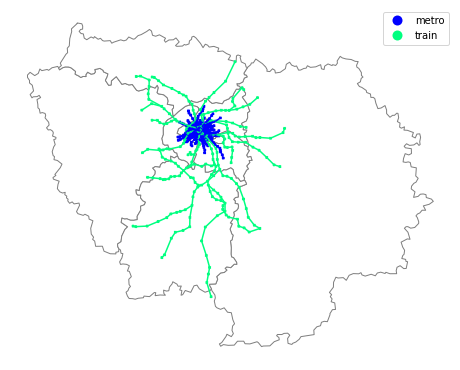

In [6]:
# example with the train and metro
base = df_reg_M.plot(color = "white",
                    edgecolor='grey', 
                     figsize=(8, 10))

df_train_metro.plot(ax=base, 
                   marker='x',
                column="layer",
                   legend=True,
                   legend_kwds={'loc': 'best'},
                   cmap="winter",  
                   markersize=5, 
                   figsize=(8, 10))

base.set_axis_off()